## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [56]:
# Your code here - remember to use markdown cells for comments as well!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression


### Checking the dataset

In [2]:
#loading the data
Housing =pd.read_csv("C:/Users/user/Desktop/Ghost_housing_Project/data/kc_house_data.csv")


In [3]:
#Checking the columns in the dataset
Housing.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [17]:
#overeview of the dataset
Housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [19]:
#Checking the number of rows and clumns
Housing.shape

(21597, 21)

In [24]:
#Checking the datatypes of the columns
Housing.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view              object
condition         object
grade             object
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [20]:
#Description of the data
Housing.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [21]:
#Checking the first5 rows
Housing .head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [22]:
#Checking the last 5 rows
Housing.tail(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,NO,NONE,...,7 Average,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


### Data Cleaning

#### Missing values

In [25]:
#Checking if the data has missing values
def identify_missing_values(data):
    """Identify if the data has missing values"""
    # identify if data has missing values(data.isnull().any())
    # empty dict to store missing values
    missing = []
    for i in data.isnull().any():
        # add the bool values to empty list 
        missing.append(i)
    # covert list to set (if data has missing value, the list should have true and false)
    missing_set = set(missing)
    if (len(missing_set) == 1):
        out = print("The Data has no missing values")
    else:
        out = print("The Data has missing values.")

    return out


identify_missing_values(Housing)

The Data has missing values.


In [37]:
#Checking the distribution of the missing values.
def missing_values(data):
    """A simple function to identify data has missing values"""
    # identify the total missing values per column
    # sort in order 
    miss = data.isnull().sum().sort_values(ascending = False)

    # calculate percentage of the missing values
    percentage_miss = (data.isnull().sum() / len(data)).sort_values(ascending = False)

    # store in a dataframe 
    missing = pd.DataFrame({"Missing Values": miss, "Percentage(%)": percentage_miss})

    # remove values that are missing 
    missing.drop(missing[missing["Percentage(%)"] == 0].index, inplace = True)

    return missing


missing_data = missing_values(Housing)
missing_data

,Missing Values,Percentage(%)
yr_renovated,3842,0.177895
waterfront,2376,0.110015
view,63,0.002917


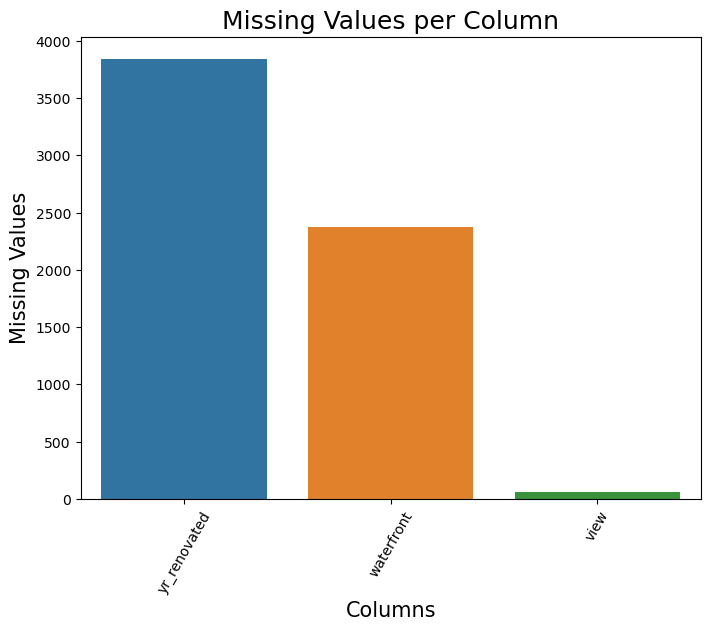

In [40]:
def graph_missing(data):
    """Graphically represent the missing values"""
    fig, axes = plt.subplots(figsize = (8, 6))

    # plot a bargraph
    sns.barplot(x = data.index , y = data["Missing Values"])
    # labeling the axes 
    plt.xlabel("Columns", fontdict={"color": "black", "size": 15})
    # rotating our xticks 
    plt.xticks(rotation = 60)
    # labeling the y axis 
    plt.ylabel("Missing Values", fontdict={"color": "black", "size": 15})
    # title 
    plt.title("Missing Values per Column", fontsize = 18)
    # display
    plt.show()

    # save the plot 
    fig.savefig("missing.png")


graph_missing(missing_data)

In [32]:
#replacing NaN values with 0
Housing.fillna(0)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


#### Duplicated values


In [34]:
#This is a function for checking if the data has duplicated values
def identify_duplicates(data):
    """Simple function to identify any duplicates"""
    # identify the duplicates (dataframename.duplicated() , can add .sum() to get total count)
    # empty list to store Bool results from duplicated
    duplicates = []
    for i in data.duplicated():
        duplicates.append(i)
    # identify if there is any duplicates. (If there is any we expect a True value in the list duplicates)
    duplicates_set = set(duplicates) 
    if (len(duplicates_set) == 1):
        print("The Data has no duplicates")
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
        # percentage of the data represented by duplicates 
        duplicates_percentage = np.round(((no_true / len(data)) * 100), 3)
        print(f"The Data has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.") 



identify_duplicates(Housing)

The Data has no duplicates


#### Checking for outliers

In [44]:
# identifying outliers
def identify_outliers(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1

    # calculate the lower and upper bounds
    lower_bound = q1 - (1.5 * iqr * (len(data[column])/(len(data[column]) + 1)))
    upper_bound = q3 + (1.5 * iqr * (len(data[column])/(len(data[column]) + 1)))

    # Identify the outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]

    return (outliers)

identify_outliers(Housing, "sqft_living")
identify_outliers(Housing, "sqft_above")
identify_outliers(Housing, "bathrooms")


5        4.50
75       4.00
235      4.00
270      4.75
300      5.00
         ... 
21535    4.50
21545    4.00
21560    4.50
21577    3.75
21584    3.75
Name: bathrooms, Length: 561, dtype: float64

## Data Analysis

#### Univariate Analysis

In [72]:
def descriptive_statistics(data, column):
    mean = np.mean(data[column])  
    median = np.median(data[column])
    std = np.std(data[column])
    range = np.ptp(data[column])

    print(f"Mean : {mean:.3f}")
    print(f"Median : {median}")
    print(f"Standard Deviation : {std:.3f}")
    print(f"Range : {range}")

In [73]:
descriptive_statistics(Housing, "price")

Mean : 540296.574
Median : 450000.0
Standard Deviation : 367359.635
Range : 7622000.0


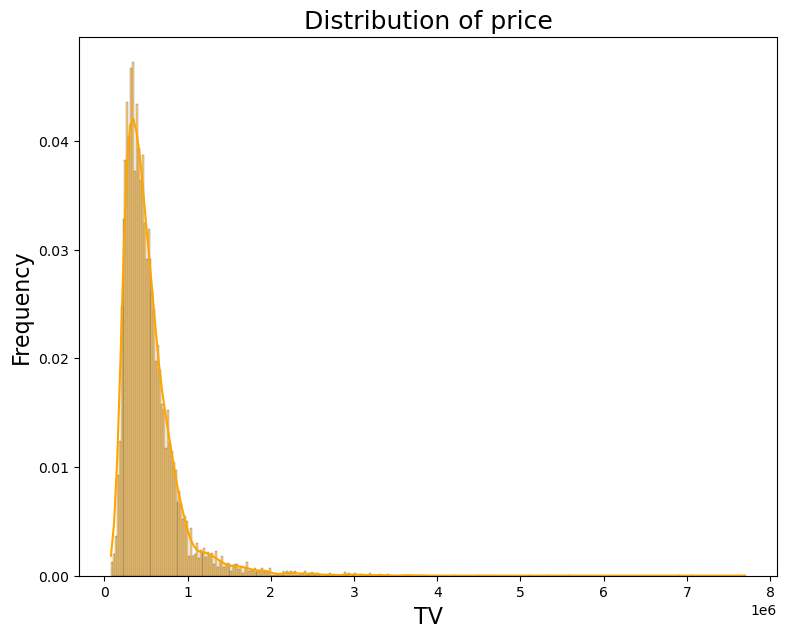

In [76]:
# visualize using data 
fig, ax = plt.subplots(figsize=(9,7))

sns.histplot(Housing["price"], stat = 'frequency', color = "orange", kde=True, ax=ax)
ax.set_ylabel("Frequency", fontsize=16)
ax.set_xlabel("TV", fontsize=16)
ax.set_title("Distribution of price", fontsize=18)

plt.show()

In [78]:
descriptive_statistics(Housing, "sqft_living")

Mean : 2080.322
Median : 1910.0
Standard Deviation : 918.085
Range : 13170


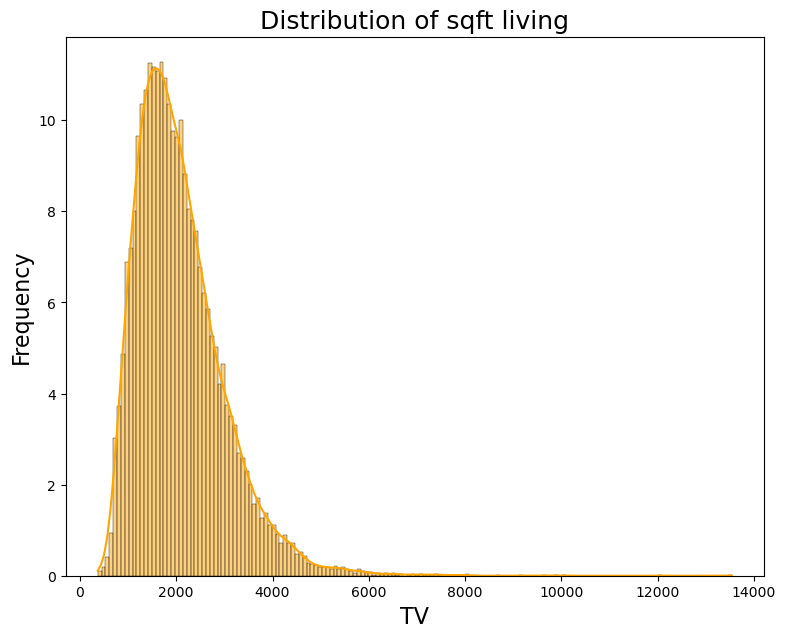

In [79]:
# visualize using data 
fig, ax = plt.subplots(figsize=(9,7))

sns.histplot(Housing["sqft_living"], stat = 'frequency', color = "orange", kde=True, ax=ax)
ax.set_ylabel("Frequency", fontsize=16)
ax.set_xlabel("TV", fontsize=16)
ax.set_title("Distribution of sqft living", fontsize=18)

plt.show()

#### Bivariate Analysis

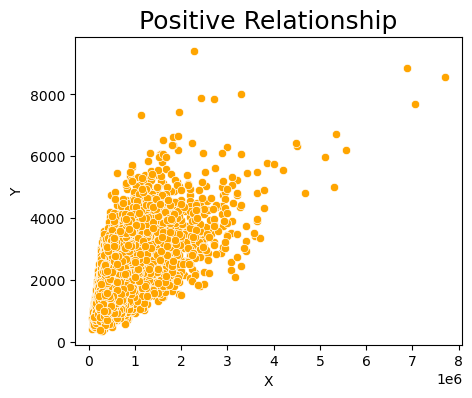

In [82]:
fig, ax = plt.subplots(figsize=(5,4))

sns.scatterplot(x=Housing["price"], y=Housing["sqft_above"], color="orange", ax=ax)
ax.set_ylabel("Y", fontsize=10)
ax.set_xlabel("X", fontsize=10)
ax.set_title("Positive Relationship", fontsize=18)

plt.show()

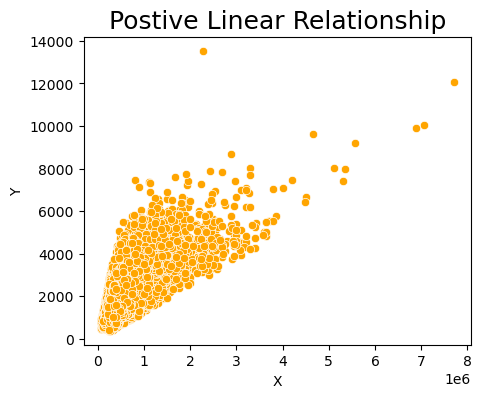

In [50]:
fig, ax = plt.subplots(figsize=(5,4))

sns.scatterplot(x=Housing["price"], y=Housing["sqft_living"], color="orange", ax=ax)
ax.set_ylabel("Y", fontsize=10)
ax.set_xlabel("X", fontsize=10)
ax.set_title("Postive Linear Relationship", fontsize=18)

plt.show()

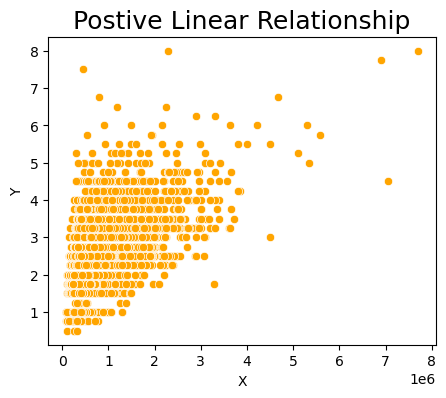

In [49]:
fig, ax = plt.subplots(figsize=(5,4))

sns.scatterplot(x=Housing["price"], y=Housing["bathrooms"], color="orange", ax=ax)
ax.set_ylabel("Y", fontsize=10)
ax.set_xlabel("X", fontsize=10)
ax.set_title("Postive Linear Relationship", fontsize=18)

plt.show()

### ASSUMPTIONS BEFORE LINEAR REGRESSION

### simple linear regression

In [97]:
X = Housing["sqft_living"]
x = np.array(X).reshape(-1,1)
y = Housing["price"]

In [98]:
# create the model object
lin_reg = LinearRegression()


In [99]:
# fit the model to the data
model = lin_reg.fit(x, y)

In [101]:
# make predictions 
Housing["predictions"] = lin_reg.predict(x)
Housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,predictions
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,287429.464749
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,677829.054708
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,172275.628862
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,506502.615949
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,427860.971929


In [102]:
# calculate the residuals and test for normality
Housing["residuals"] = Housing["price"] - Housing["predictions"]
Housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,predictions,residuals
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,287429.464749,-65529.464749
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,677829.054708,-139829.054708
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,172275.628862,7724.371138
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,506502.615949,97497.384051
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,427860.971929,82139.028071


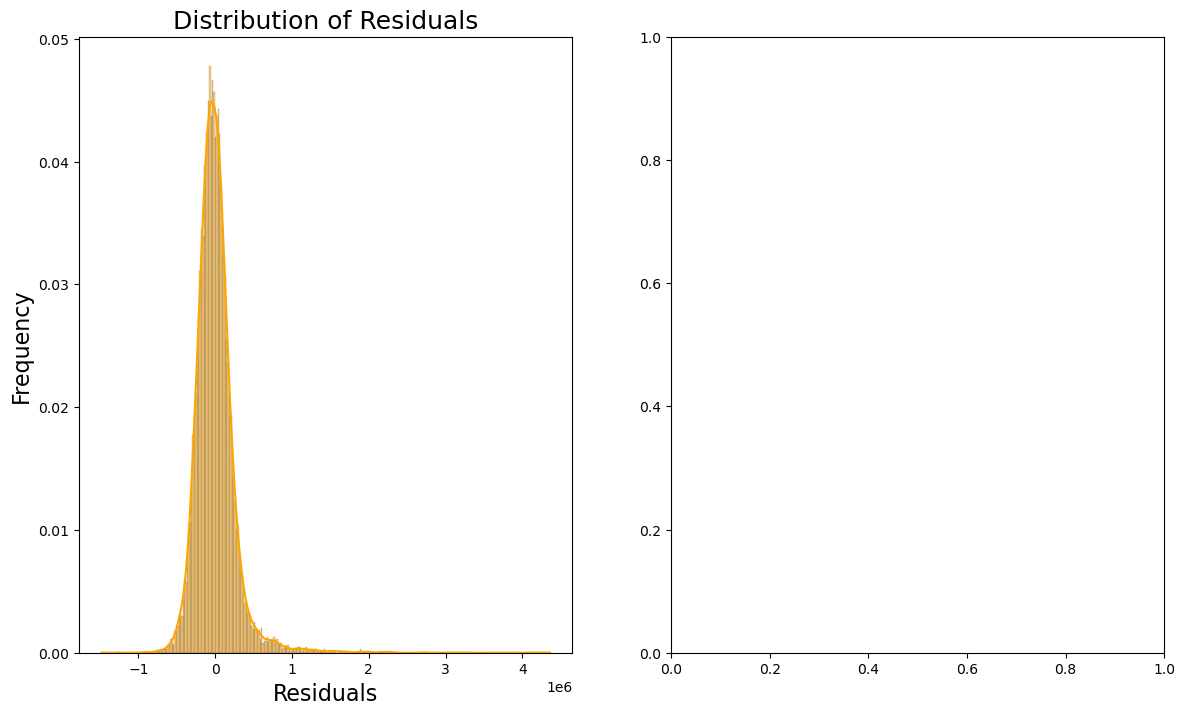

In [109]:
fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(14,8))

# using a histogram
sns.histplot(Housing["residuals"], stat = 'frequency', color = "orange", kde=True, ax=ax[0])
ax[0].set_ylabel("Frequency", fontsize=16)
ax[0].set_xlabel("Residuals", fontsize=16)
ax[0].set_title("Distribution of Residuals", fontsize=18)


plt.show()

In [110]:
# performing durbin-watson test for independence of observations assumptions 
durbin_watson_statistic = sm.stats.stattools.durbin_watson(Housing["residuals"])
print("Durbin-Wason statistic:", durbin_watson_statistic)

Durbin-Wason statistic: 1.98231148610529


In [112]:
# calculate the mean and standard deviation of residuals
residuals_mean = np.mean(Housing["residuals"])
residuals_std = np.std(Housing["residuals"], ddof=1)

# calculate the standardized residuals
Housing["std_resid"] = Housing["residuals"] / residuals_std

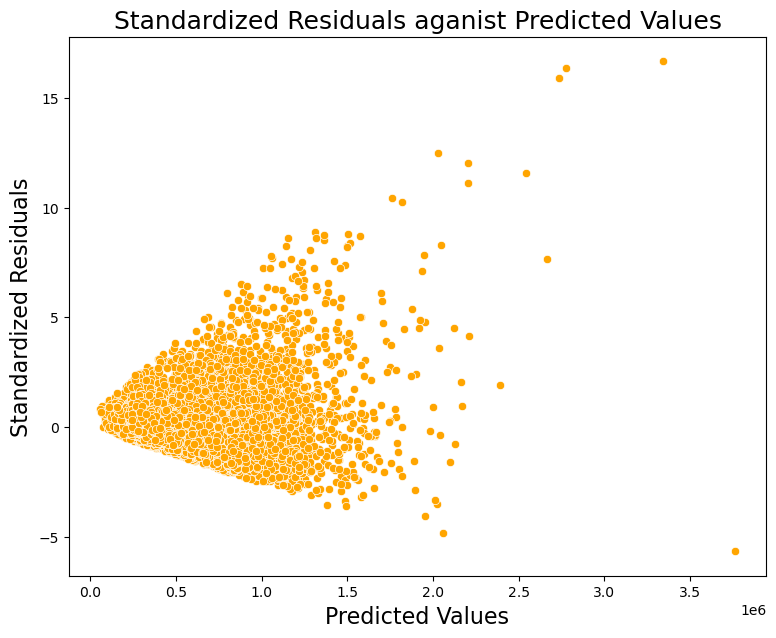

In [113]:
# visualize
fig, ax = plt.subplots(figsize=(9,7))

sns.scatterplot(x=Housing["predictions"], y=Housing["std_resid"], color="orange", ax=ax)
ax.set_ylabel("Standardized Residuals", fontsize=16)
ax.set_xlabel("Predicted Values", fontsize=16)
ax.set_title("Standardized Residuals aganist Predicted Values", fontsize=18)

plt.show()

In [114]:
# slope
model.coef_

array([280.86301436])

In [115]:
# y-intercept
model.intercept_

-43988.892194227665

In [116]:
# coefficient of determination R^2 of the prediction
model.score(x, y)


0.49268789904035093

In [118]:
# rmse 
mse = mean_squared_error(Housing["Sales"], Housing["predictions"])
rmse = np.sqrt(mse)
print(f"The Mean Squarred Error: {np.round(rmse,4)}")

NameError: name 'mean_squared_error' is not defined

In [119]:
def plot_regression_line(X, y, b):
    """Simple function that draws the regression line"""
    # plot using a scatter plot
    fig, ax = plt.subplots(figsize=(8, 6))

    plt.scatter(X, y, color = "b", s = 30)

    # predict dependent variable 
    y_pred = b[1] + b[0] * X

    # plot regression line
    plt.plot(X, y_pred, color = 'g')

    # lable 
    plt.xlabel("X", fontsize = 12)
    plt.ylabel("y", fontsize = 12)

    plt.show()

b = find_slope_intercept(Housing["sqft_living"], Housing["Price"])

plot_regression_line(Housing["sqft_living"], Housing["Price"], b)

NameError: name 'find_slope_intercept' is not defined

#### Multiple linear regression

In [12]:
#Checking the correlation of the variables
Housing.corr(numeric_only = True)["price"]

id              -0.016772
price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
sqft_above       0.605368
yr_built         0.053953
yr_renovated     0.129599
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
Name: price, dtype: float64

In [35]:
# define predictors and response
X = Housing[["bathrooms", "sqft_living", "sqft_above"]]
y = Housing["price"]
# add constant to the model
x = sm.add_constant(X)

# create model object
model = sm.OLS(y, x)
# fit the model
result = model.fit(method='pinv')
# print the summary output 
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     7003.
Date:                Fri, 07 Jul 2023   Prob (F-statistic):               0.00
Time:                        00:27:01   Log-Likelihood:            -3.0005e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21593   BIC:                         6.001e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.815e+04   5252.893     -7.262      0.000   -4.84e+04   -2.79e+04
bathrooms   -3972.1769   3545.059     -1.120      0.263   -1.09e+04    2976.400
sqft_living   297.9354      4.483     66.458      0.000     289.148     306.723
sqft_above    -18.4232      4.479     -4.113      0.000     -27.202      -9.644
==============================================================================
Omnibus:                    14748.993   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           538245.600
Skew:                           2.806   Prob(JB):                         0.00
Kurtosis:                      26.804   Cond. No.                     9.59e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
# calculate VIF and Toleance

def calc_vif(X):
    # calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return vif

In [37]:
calc_vif(X)


,variables,VIF
0,bathrooms,14.464449
1,sqft_living,32.803536
2,sqft_above,24.433898
